In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import statsmodels.api as sm
import pathlib

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('/content/설문결과-Raw-Data.csv',sep=',')

In [ ]:
df.columns = ['인식매체','경험','인식','관심도','지식','구성원동의','환경','비용지불의사','정부지원정책','犬성별','중성화','나이','털길이','품종','색상','크기','성격','공고기간','입양희망여부','d1','d2','조사 나이대','성별','d5','d6']
df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,크기,성격,공고기간,입양희망여부,d1,d2,조사 나이대,성별,d5,d6
0,1,1,2,3,4,2,2,5,4,2,...,3,2,4,1,4,1,61,1,3,NaN
1,1,1,4,5,4,4,5,4,4,1,...,4,4,4,2,1,2,26,1,3,NaN
2,1,1,2,4,4,2,2,4,4,1,...,3,2,3,2,3,1,46,1,3,NaN
3,1,2,3,2,2,3,2,2,2,2,...,3,4,4,3,3,1,53,2,6,NaN
4,1,2,3,2,2,3,3,4,4,2,...,3,3,3,2,2,1,41,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,2,3,2,3,3,2,2,4,2,...,3,3,3,2,3,1,30,2,3,NaN
296,1,1,5,5,3,4,4,4,4,2,...,3,3,3,3,3,2,67,2,4,NaN
297,1,1,3,4,4,4,3,4,4,1,...,2,3,3,3,1,3,45,1,3,NaN
298,1,1,2,3,1,2,3,2,1,2,...,1,1,1,3,2,2,43,1,3,NaN


In [ ]:
clean_df = df.drop(['d1','d2','d5','d6'], axis = 1) # 라이프 스타일, 나이 등
real_df = clean_df.drop(0,axis=0)
real_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 1 to 299
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   인식매체    299 non-null    int64
 1   경험      299 non-null    int64
 2   인식      299 non-null    int64
 3   관심도     299 non-null    int64
 4   지식      299 non-null    int64
 5   구성원동의   299 non-null    int64
 6   환경      299 non-null    int64
 7   비용지불의사  299 non-null    int64
 8   정부지원정책  299 non-null    int64
 9   犬성별     299 non-null    int64
 10  중성화     299 non-null    int64
 11  나이      299 non-null    int64
 12  털길이     299 non-null    int64
 13  품종      299 non-null    int64
 14  색상      299 non-null    int64
 15  크기      299 non-null    int64
 16  성격      299 non-null    int64
 17  공고기간    299 non-null    int64
 18  입양희망여부  299 non-null    int64
 19  조사 나이대  299 non-null    int64
 20  성별      299 non-null    int64
dtypes: int64(21)
memory usage: 51.4 KB


In [ ]:
idx = real_df[real_df["입양희망여부"] == 3].index     #  인덱스의 값이 저장됨
real_df.drop(idx , inplace=True) # 해당 인덱스를 제거함

In [ ]:
old_range = {'인식매체': {2:0}, '경험':{2:0} 입양희망여부' : {2:0}, '성별' : {2:0}} # 0 입양안한다, 1 한다,    성별 - 0 = 여자, 1 = 남자    0 - 안한다
logi_df = real_df.replace(old_range)
logi_df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,나이,털길이,품종,색상,크기,성격,공고기간,입양희망여부,조사 나이대,성별
1,1,1,4,5,4,4,5,4,4,1,...,4,3,4,3,4,4,4,0,26,1
2,1,1,2,4,4,2,2,4,4,1,...,3,3,4,3,3,2,3,0,46,1
4,1,2,3,2,2,3,3,4,4,2,...,3,3,4,4,3,3,3,0,41,0
5,1,1,4,5,4,5,3,5,4,1,...,3,2,4,4,2,3,5,1,29,0
7,1,1,4,5,4,4,4,4,5,1,...,3,4,5,3,2,3,4,1,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,1,3,4,4,4,4,5,5,1,...,4,3,4,3,4,3,4,1,52,1
291,1,2,2,3,3,2,2,2,4,1,...,3,3,3,3,3,2,3,0,26,0
292,1,1,2,3,3,4,4,3,3,1,...,4,4,5,5,4,3,4,1,33,1
295,1,2,3,2,3,3,2,2,4,2,...,3,3,4,4,3,3,3,0,30,0


# 로지스틱 회귀분석 (종속변수 = 입양희망여부)

In [ ]:
logi_df.describe().T #입양 희망여부 평균 0.497 => 결과변수 균형잡힘

,count,mean,std,min,25%,50%,75%,max
인식매체,203.0,1.098522,0.298756,1.0,1.0,1.0,1.0,2.0
경험,203.0,1.280788,0.450495,1.0,1.0,1.0,2.0,2.0
인식,203.0,3.305419,0.962320,1.0,3.0,3.0,4.0,5.0
관심도,203.0,3.413793,1.128482,1.0,3.0,4.0,4.0,5.0
지식,203.0,3.113300,0.996017,1.0,2.0,3.0,4.0,5.0
구성원동의,203.0,3.187192,1.162293,1.0,2.0,3.0,4.0,5.0
환경,203.0,2.778325,1.154039,1.0,2.0,3.0,4.0,5.0
비용지불의사,203.0,3.137931,1.194331,1.0,2.0,3.0,4.0,5.0
정부지원정책,203.0,3.650246,1.072075,1.0,3.0,4.0,4.0,5.0
犬성별,203.0,1.522167,0.500743,1.0,1.0,2.0,2.0,2.0


In [ ]:
logi_df.max()

인식매체       2
경험         2
인식         5
관심도        5
지식         5
구성원동의      5
환경         5
비용지불의사     5
정부지원정책     5
犬성별        2
중성화        5
나이         5
털길이        5
품종         5
색상         5
크기         5
성격         5
공고기간       5
입양희망여부     1
조사 나이대    68
성별         1
dtype: int64

In [ ]:
logi_df["입양희망여부"].value_counts() # 0 입양x, 1 입양 o

0    102
1    101
Name: 입양희망여부, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


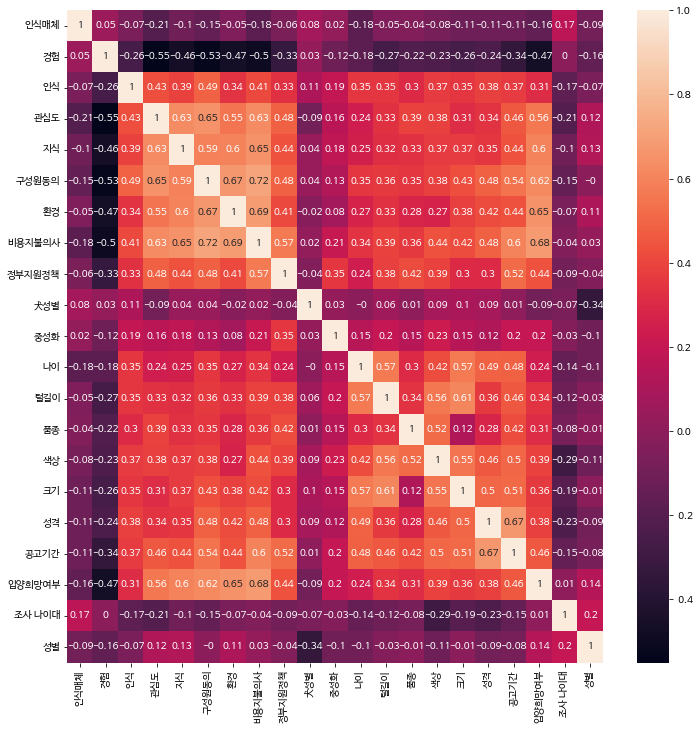

In [ ]:
plt.figure(figsize=(12,12))

corr_=logi_df.corr().round(2)
sns.heatmap(corr_, annot=True)
plt.show()

In [ ]:
x = logi_df.drop('입양희망여부', axis=1)  #변수 지정
y = logi_df['입양희망여부']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(x_train, y_train) #모델의 정확도 확인
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))

학습용 데이터셋 정확도 : 0.89
검증용 데이터셋 정확도 : 0.89


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import classification_report
y_pred=log.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89        35
           1       0.81      0.96      0.88        26

    accuracy                           0.89        61
   macro avg       0.89      0.90      0.88        61
weighted avg       0.90      0.89      0.89        61



In [ ]:
logit = sm.Logit(logi_df[['입양희망여부']],x) #로지스틱 회귀분석 시행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.294000
         Iterations 8


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 입양희망여부   No. Observations:                  203
Model:                          Logit   Df Residuals:                      183
Method:                           MLE   Df Model:                           19
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                  0.5758
Time:                        04:25:57   Log-Likelihood:                -59.682
converged:                       True   LL-Null:                       -140.71
Covariance Type:            nonrobust   LLR p-value:                 1.013e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
인식매체          -3.1495      1.043     -3.019      0.003      -5.194      -1.105
경험            -2.0476      0.639     -3.206      0.001      -3.299      -0.796
인식            -0.1971      0.342     -0.576      0.564      -0.867       0.473
관심도           -0.2828      0.345     -0.820      0.412      -0.959       0.393
지식             0.6159      0.374      1.645      0.100      -0.118       1.350
구성원동의          0.5991      0.375      1.599      0.110      -0.135       1.333
환경             1.0413      0.323      3.227      0.001       0.409       1.674
비용지불의사         0.9988      0.373      2.675      0.007       0.267       1.731
정부지원정책        -0.1706      0.307     -0.555      0.579      -0.773       0.432
犬성별           -1.4910      0.530     -2.814      0.005      -2.530      -0.453
중성화           -0.0491      0.308     -0.159      0.873      -0.653       0.555
나이            -1.1582      0.431     -2.689      0.007      -2.002      -0.314
털길이            0.7830      0.428      1.831      0.067      -0.055       1.621
품종             0.0965      0.380      0.254      0.800      -0.648       0.841
색상             0.5919      0.392      1.509      0.131      -0.177       1.361
크기            -0.1797      0.373     -0.482      0.630      -0.911       0.552
성격             0.0084      0.359      0.023      0.981      -0.695       0.712
공고기간          -0.0637      0.414     -0.154      0.878      -0.875       0.748
조사 나이대         0.0087      0.024      0.361      0.718      -0.039       0.056
성별            -0.5884      0.564     -1.044      0.297      -1.693       0.516
==============================================================================
"""

In [ ]:
np.exp(result.params) #오즈비가 1 기준으로 큰지 작은지 파악 1과 값이 수렴한다면 영향 x

인식매체      0.042874
경험        0.129046
인식        0.821126
관심도       0.753647
지식        1.851316
구성원동의     1.820462
환경        2.832770
비용지불의사    2.714948
정부지원정책    0.843155
犬성별       0.225139
중성화       0.952080
나이        0.314060
털길이       2.187970
품종        1.101269
색상        1.807433
크기        0.835548
성격        1.008446
공고기간      0.938321
조사 나이대    1.008774
성별        0.555194
dtype: float64